# EventXtract MOOC2015 :Features Extraction

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=1000

In [2]:
mooc = pd.read_csv('./Input/EventXtract_MOOC2015_Preprocessed.csv',sep=",",index_col=False,error_bad_lines=False)
mooc['time']=pd.to_datetime(mooc['time'])
mooc.sort_values("time",inplace=True)
mooc.drop('Unnamed: 0', axis=1, inplace=True)
mooc.set_index('anon_screen_name',inplace=True)
mooc.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,week,event_type,resource_display_name,time,event_duration,nbr_session,success,video_code,video_current_time,video_speed,video_old_time,video_new_time,video_seek_type,video_new_speed,video_old_speed,goto_from,goto_dest,ip_country,events
anon_screen_name,,,,,,,,,,,,,,,,,,,
9a3d3f219e4cc1122e929e2daa4a7afcfc6ec2d9,NaN,about,NaN,2015-01-19 00:02:43,65913.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1.0,GBR,about
d39809aa673c09a836815d09b44f7ca9c9bed463,NaN,about,NaN,2015-01-19 00:02:49,44.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1.0,ITA,about
d39809aa673c09a836815d09b44f7ca9c9bed463,NaN,edx.course.enrollment.activated,NaN,2015-01-19 00:03:33,71802.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1.0,ITA,edx.course.enrollment.activated
34a807d69e6169b69c21572dbc45524b4384aadf,NaN,about,NaN,2015-01-19 00:03:44,170.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1.0,EGY,about
34a807d69e6169b69c21572dbc45524b4384aadf,NaN,about,NaN,2015-01-19 00:06:34,19450.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1.0,EGY,about


In [17]:
mooc.video_code.unique().size

78

In [4]:
mooc.week.unique()

array([nan,  1.,  2.,  7.,  6.,  4.,  8.,  3.,  5.,  9.])

In [10]:
mooc.event_type.unique()

array(['about', 'edx.course.enrollment.activated',
       'edx.course.enrollment.deactivated', 'info', 'courseware_menu',
       'courseware_5bc11f959e6641a7abdffbd29ac1c66e', 'page_close',
       'Statement', 'courseware_d9820868fd3642f19ee45e273e3dfafa',
       '/courses/humanitiesandscience/statlearning/winter2015/',
       'ch1_Seq1', 'view_post', 'show_transcript', 'load_video',
       'progress', 'slides',
       'courseware_58bee9a364d14f6d9306f0e554acf46c', 'R_sessions',
       'seq_goto', 'ch1_Seq2', 'hide_transcript', 'chapter_1', 'ch1_Seq3',
       'play_video', 'goto_position', 'problem_get', 'ch2_Seq3',
       'pause_video', 'speed_change_video', 'seek_video', 'ch2_Seq1',
       'ch2_Seq7', 'save_problem_success', 'problem_save', 'ch2_Seq2',
       'ch2_Seq5', 'ch2_Seq4', 'download', 'stop_video', 'thread_reply',
       'problem_check', 'forum_search', 'showanswer', 'problem_show',
       'seq_prev', 'seq_next', 'chapter_2', 'comment_reply', 'user_view',
       'thread_upd

In [7]:
#14308273
mooc.shape

(14308273, 19)

In [8]:
mooc.index.nunique()

32185

# Export a leraner traces ---> EXCEL

In [221]:
ex=pd.ExcelWriter('learner_traces_ae.xlsx')
mooc[mooc.index=="01658f96b9cbde61b5ae742a9b062991a99524ae"].to_excel(ex,sheet_name="learner")
ex.save()

# Memory optimisation

In [20]:
mooc.ip_country=mooc.ip_country.astype('category')
mooc.event_type=mooc.event_type.astype('category')

In [21]:
mask_time=mooc.event_duration>1800
mooc.ix[mask_time,'event_duration']=1800

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Active LS

## Features

In [18]:
problem_name=['1.2.R1', '1.2.R2', '2.Q.1', '2.Q.3', '2.Q.2', '2.Q.4', '2.1 R1',
       '2.R.R1', '2.2 R1', '2.2 R2', '2.3 R1', '2.4.R1', 'Chapter 2 Quiz',
       'Ch3 Quiz Questions', 'Multiple Choice', '3.1.R1', '3.1.R2',
       '7.R.R1', '7.R.R2', '3.R.R1', '5.R.R1', '5.R.R2', '5.R.R3',
       '5.R.R4', '3.2.R1', '3.2.R2', '3.3.R1', '3.4.R1', '3.4.R2',
       '3.5.R1', '3.5.R2', 'Chapter 3 Quiz', '8.R.R1', '9.R.1', '9.R.2',
       '9.R.3', '3.1 Review Questions', '8.4.R1', '8.4.R2', '7.1.R1',
       '7.2.R1', '7.2.R2', '9.Q.1', '4.1 R1', '4.1 R2', '4.2.R1', '4.3.R1',
       '4.3.R2', '4.Q.1', '4.4 R1', '4.5 R1', '4.6.R1', '4.7.R1', '4.8.R1',
       '4.R.R1', 'Chapter 4 Quiz', '5.1.R1', '5.1.R2', '5.2.R1', '5.3.R1',
       '5.4.R1', '5.Q.2', '5.Q.1', '5.5.R1', 'Chapter 5 Quiz', ' 6.Q.1',
       '6.Q.2', '6.Q.3', '6.Q.4', '6.Q.5', '7.Q.1', '6.1.R1', '6.2.R1',
       '6.2.R2', '6.3.R1', '6.3.R2', '6.4.R1', '6.5.R1', '6.6.R1',
       '6.6.R2', '6.7 R1', '6.10.R1', '6.R.R1', '6.8 R1', '6.9.R1',
       'Chapter 6 Quiz', '7.3.R1', '7.4.R1', 'Chapter 7 Quiz', '8.1.R1',
       '8.2.R1', '8.3.R1', '8.3.R2', '8.5.R1', '8.Q1', '8.Q2', '8.Q3',
       'Chapter 8 Quiz', '9.1.R1', '9.2.R1', '9.3.R2', '9.3.R1', '9.4.R1',
       'Chapter 9 Quiz', '10.1.R1', '10.2.R1', '10.3.R1', '10.4.R1',
       '10.5.R1', '10.Q.1', '10.R.1', '10.R.2', '10.R.3', 'Chapter 10 Quiz']

In [27]:
len(problem_name)

114

### Features base

In [81]:
learners=mooc.groupby("anon_screen_name")
A_agg_learner=learners.agg({'event_type':{
        'nbr_events':lambda x:x.count(),
        'nbr_pause_video':lambda x: (x == 'pause_video').sum(),         
        'forum_thread_reply':lambda x: (x == 'thread_reply').sum(),
        'forum_comment_reply':lambda x: (x == 'comment_reply').sum(),
        'forum_thread_update':lambda x: (x == 'thread_update').sum(),
        'forum_comment_update':lambda x: (x == 'comment_update').sum()
},
'nbr_session':{
    'nbr_sessions':lambda x:x.max()+1
},'resource_display_name':{
    'nbr_problem_visit':lambda x: x[x.isin(problem_name)].nunique()
},'week':{
    'nbr_week':lambda x:x.nunique()
}                       
                           })  
A_agg_learner.columns = A_agg_learner.columns.droplevel()

A_agg_learner['nbr_forum_post_update']=A_agg_learner.forum_thread_update +  A_agg_learner.forum_comment_update
A_agg_learner['nbr_forum_post_reply']=A_agg_learner.forum_thread_reply + A_agg_learner.forum_comment_reply
A_agg_learner['nbr_forum_post']=A_agg_learner.nbr_forum_post_update + A_agg_learner.nbr_forum_post_reply
A_agg_learner.drop('forum_thread_update', axis=1, inplace=True)
A_agg_learner.drop('forum_comment_update', axis=1, inplace=True)
A_agg_learner.drop('forum_thread_reply', axis=1, inplace=True)
A_agg_learner.drop('forum_comment_reply', axis=1, inplace=True)
A_agg_learner.drop('nbr_forum_post_reply', axis=1, inplace=True)
A_agg_learner.drop('nbr_forum_post_update', axis=1, inplace=True)
# ActiveLS=A_agg_learner
A_agg_learner.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,nbr_events,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_week,nbr_forum_post
anon_screen_name,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,2,1,0,1.0,0
0003ece6f51872662ee9b366cd2a72434e01a139,382,32,93,6,1.0,0
00042c13310b03b6fc30c30c34efd2ad127517be,99,9,1,5,1.0,0
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,309,13,23,5.0,0
0007c3a1163a8b19781443bde21b785900f56814,127,9,2,3,1.0,0


In [82]:
A_agg_learner[A_agg_learner.index=="f9821c3276134b55f6364309ddb9d8aa21149e9e"]

,nbr_events,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_week,nbr_forum_post
anon_screen_name,,,,,,
f9821c3276134b55f6364309ddb9d8aa21149e9e,4265,1071,65,103,9.0,0


### problem_stay

In [83]:
mooc_problem= mooc[mooc.event_type=='problem_get']
learners_problem=mooc_problem.groupby("anon_screen_name")

A_problem_stay=learners_problem.agg({'event_duration':{
        'problem_stay':lambda x: x.sum()     
}})

# problem stay
A_problem_stay.columns = A_problem_stay.columns.droplevel()
A_problem_stay.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,problem_stay
anon_screen_name,
0003ece6f51872662ee9b366cd2a72434e01a139,22.0
00042c13310b03b6fc30c30c34efd2ad127517be,62.0
00055cea4f5db0c8569127d8ac89a7d130c730cf,514.0
0007c3a1163a8b19781443bde21b785900f56814,127.0
00142b5b7e9b7c3475c56f8949e7242dd0737fd1,2695.0


### problem_submit

In [84]:
prb_submit= mooc[mooc.event_type=="problem_check"]
learners_prb_submit=prb_submit.groupby("anon_screen_name")

nbr_problem_submit=learners_prb_submit.agg({'resource_display_name':{
        'nbr_problem_submit':lambda x: x.nunique()     
}})

# problem submit
nbr_problem_submit.columns = nbr_problem_submit.columns.droplevel()
nbr_problem_submit.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,nbr_problem_submit
anon_screen_name,
00042c13310b03b6fc30c30c34efd2ad127517be,5
00055cea4f5db0c8569127d8ac89a7d130c730cf,20
0007c3a1163a8b19781443bde21b785900f56814,3
00142b5b7e9b7c3475c56f8949e7242dd0737fd1,41
001696bee8d6ca595cae2b43941f267d3192fb1f,102


In [85]:
nbr_problem_submit[nbr_problem_submit.index=="00142b5b7e9b7c3475c56f8949e7242dd0737fd1"]

,nbr_problem_submit
anon_screen_name,
00142b5b7e9b7c3475c56f8949e7242dd0737fd1,41


### Aggregation 

In [86]:
A_agg_learner.reset_index(level=0, inplace=True)
A_problem_stay.reset_index(level=0, inplace=True)
nbr_problem_submit.reset_index(level=0, inplace=True)

A_agg_learner=pd.merge(A_agg_learner, A_problem_stay,how='outer', on='anon_screen_name')
A_LS=pd.merge(A_agg_learner, nbr_problem_submit,how='outer', on='anon_screen_name')


# A_LS.set_index("anon_screen_name",inplace=True)
# A_LS['problem_stay_min']=A_LS.problem_stay/60
# A_LS.drop('problem_stay', axis=1, inplace=True)
# A_LS.fillna(value=0,inplace=True)
A_LS.head()

,anon_screen_name,nbr_events,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_week,nbr_forum_post,problem_stay,nbr_problem_submit
0,000319dcc413983e25dee182bae7b1d76ebe8d9b,15,2,1,0,1.0,0,NaN,NaN
1,0003ece6f51872662ee9b366cd2a72434e01a139,382,32,93,6,1.0,0,22.0,NaN
2,00042c13310b03b6fc30c30c34efd2ad127517be,99,9,1,5,1.0,0,62.0,5.0
3,00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,309,13,23,5.0,0,514.0,20.0
4,0007c3a1163a8b19781443bde21b785900f56814,127,9,2,3,1.0,0,127.0,3.0


In [87]:
A_LS.set_index("anon_screen_name",inplace=True)
A_LS.fillna(value=0,inplace=True)
A_LS['problem_stay_min']=A_LS.problem_stay/60
A_LS.drop('problem_stay', axis=1, inplace=True)
A_LS.head()

,nbr_events,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_week,nbr_forum_post,nbr_problem_submit,problem_stay_min
anon_screen_name,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,2,1,0,1.0,0,0.0,0.000000
0003ece6f51872662ee9b366cd2a72434e01a139,382,32,93,6,1.0,0,0.0,0.366667
00042c13310b03b6fc30c30c34efd2ad127517be,99,9,1,5,1.0,0,5.0,1.033333
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,309,13,23,5.0,0,20.0,8.566667
0007c3a1163a8b19781443bde21b785900f56814,127,9,2,3,1.0,0,3.0,2.116667


In [88]:
A_LS['avg_problem_submit']=A_LS.nbr_problem_submit/A_LS.nbr_problem_visit
A_LS.fillna(value=0,inplace=True)
A_LS.head()

,nbr_events,nbr_pause_video,nbr_sessions,nbr_problem_visit,nbr_week,nbr_forum_post,nbr_problem_submit,problem_stay_min,avg_problem_submit
anon_screen_name,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,2,1,0,1.0,0,0.0,0.000000,0.000000
0003ece6f51872662ee9b366cd2a72434e01a139,382,32,93,6,1.0,0,0.0,0.366667,0.000000
00042c13310b03b6fc30c30c34efd2ad127517be,99,9,1,5,1.0,0,5.0,1.033333,1.000000
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,309,13,23,5.0,0,20.0,8.566667,0.869565
0007c3a1163a8b19781443bde21b785900f56814,127,9,2,3,1.0,0,3.0,2.116667,1.000000


In [89]:
A_LS=A_LS[['nbr_events','nbr_week','nbr_pause_video','nbr_problem_visit','problem_stay_min','nbr_problem_submit',
           'avg_problem_submit','nbr_forum_post','nbr_sessions',
           ]]

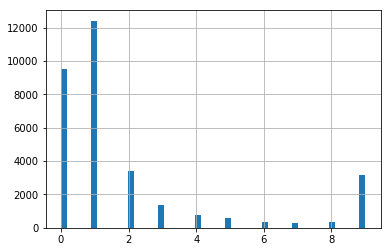

In [157]:
# A_LS.nbr_events.hist(bins=50)
A_LS.nbr_week.hist(bins=50)

# Outliers detection

## Isolation Forest

In [141]:
lr_traces=A_LS[['nbr_events','nbr_week']]
lr_traces.head()

,nbr_events,nbr_week
anon_screen_name,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0
0007c3a1163a8b19781443bde21b785900f56814,127,1.0


In [142]:
from sklearn import ensemble
# A_LS.set_index("anon_screen_name",inplace=True)

active_anomaly_detector=ensemble.IsolationForest(contamination=0.0001)              
active_anomaly_detector.fit(lr_traces)
active_anomaly_prediction=active_anomaly_detector.predict(lr_traces)

inliers = active_anomaly_prediction == 1  # select inliers
print(len(active_anomaly_prediction[inliers]))

outliers = active_anomaly_prediction == -1  # select outliers
print(len(active_anomaly_prediction[outliers]))

32181
4


In [143]:
lr_traces.reset_index(level=0, inplace=True)
index_list=list(lr_traces['anon_screen_name'])
lr_list=dict(zip(index_list, active_anomaly_prediction))

A_anomaly=pd.DataFrame.from_dict(lr_list, orient='index')
A_anomaly.columns = ['outliers']
A_anomaly.head()

,outliers
000319dcc413983e25dee182bae7b1d76ebe8d9b,1
0003ece6f51872662ee9b366cd2a72434e01a139,1
00042c13310b03b6fc30c30c34efd2ad127517be,1
00055cea4f5db0c8569127d8ac89a7d130c730cf,1
0007c3a1163a8b19781443bde21b785900f56814,1


In [ ]:
d6d0454b50adf5d40c30d30eb369e2b675eea67f

In [145]:
A_anomaly.reset_index(level=0, inplace=True)
A_anomaly=A_anomaly.rename(columns={'index':'anon_screen_name'})

A_LS_anomaly=pd.merge(lr_traces, A_anomaly, on='anon_screen_name')
A_LS_anomaly.set_index("anon_screen_name",inplace=True)

A_LS_anomaly.head()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [147]:
A_LS_anomaly[A_LS_anomaly.outliers==-1]

,nbr_events,nbr_week,outliers
anon_screen_name,,,
30a47f572f1d4e8b5e47b494f4ea522d7aebcbc4,7754,5.0,-1
42fccbb9d34edd3607fca71edd15ef23c14e87a7,8334,7.0,-1
d40c62b5d1d4951a5c531048fd248785ed5ba268,12270,4.0,-1
d6d0454b50adf5d40c30d30eb369e2b675eea67f,53513,1.0,-1


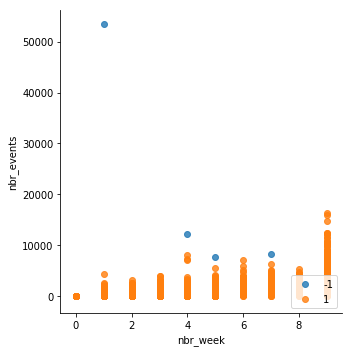

In [146]:
sns.lmplot( x="nbr_week", y="nbr_events", data=A_LS_anomaly, 
           fit_reg=False, hue='outliers', legend=False)
plt.legend(loc='lower right')


## Local Outliers Factor

In [133]:
from sklearn.neighbors import LocalOutlierFactor

# A_LS.set_index("anon_screen_name",inplace=True)
A_LS.fillna(value=0,inplace=True)
lof_labels = LocalOutlierFactor(n_neighbors=2, algorithm='kd_tree').fit_predict(A_LS)
outliers = lof_labels == -1  # select inliers
len(lof_labels[outliers])

3219

# Exportation Active Features

In [162]:
A_LS.head()

,nbr_events,nbr_week,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions
anon_screen_name,,,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,2,0,0.000000,0.0,0.000000,0,1
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,32,6,0.366667,0.0,0.000000,0,93
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,9,5,1.033333,5.0,1.000000,0,1
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,309,23,8.566667,20.0,0.869565,0,13
0007c3a1163a8b19781443bde21b785900f56814,127,1.0,9,3,2.116667,3.0,1.000000,0,2


In [164]:
A_LS_inliers=A_LS[A_LS.index!="d6d0454b50adf5d40c30d30eb369e2b675eea67f"]

In [165]:
A_LS_inliers.to_csv("active_features_inliers.csv",columns=['anon_screen_name','nbr_events','nbr_week','nbr_pause_video','nbr_problem_visit','problem_stay_min','nbr_problem_submit',
           'avg_problem_submit','nbr_forum_post','nbr_sessions'])

# --------------------------------------

# Reflective LS

## features base

In [192]:
learners=mooc.groupby("anon_screen_name")
R_agg_student=learners.agg({
'event_type':{
        'nbr_events':lambda x:x.count(),           
        'view_post':lambda x: (x == 'view_post').sum(),
        'about':lambda x: (x == 'about').sum(),          
        'infor':lambda x: (x == 'info').sum()
},
'resource_display_name':{
    'nbr_problem_visit':lambda x: x[x.isin(problem_name)].nunique()
},'week':{
    'nbr_week':lambda x:x.nunique()
} 
})    
R_agg_student.columns = R_agg_student.columns.droplevel()
R_agg_student.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,nbr_events,view_post,about,infor,nbr_problem_visit,nbr_week
anon_screen_name,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,0,2,1,0,1.0
0003ece6f51872662ee9b366cd2a72434e01a139,382,21,1,1,6,1.0
00042c13310b03b6fc30c30c34efd2ad127517be,99,0,0,3,5,1.0
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,0,4,8,23,5.0
0007c3a1163a8b19781443bde21b785900f56814,127,0,2,3,3,1.0


## showanswer  stay

In [193]:
mooc_showanswer= mooc[mooc.event_type=='showanswer']
learners_showanswer=mooc_showanswer.groupby("anon_screen_name")

showanswer_stay=learners_showanswer.agg({'event_duration':{
        'showanswer_stay':lambda x: x.sum()     
},
'event_type':{
        'nbr_showanswer':lambda x:x.count()
}                                      
 })

# showanswer stay
showanswer_stay.columns = showanswer_stay.columns.droplevel()
showanswer_stay.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,showanswer_stay,nbr_showanswer
anon_screen_name,,
00042c13310b03b6fc30c30c34efd2ad127517be,187.0,2
00055cea4f5db0c8569127d8ac89a7d130c730cf,456.0,22
0007c3a1163a8b19781443bde21b785900f56814,7.0,1
00142b5b7e9b7c3475c56f8949e7242dd0737fd1,80.0,12
001696bee8d6ca595cae2b43941f267d3192fb1f,3197.0,78


## Problem show stay

In [194]:
mooc_problem_show= mooc[mooc.event_type=='problem_show']
learners_problem_show=mooc_problem_show.groupby("anon_screen_name")

problem_show_stay=learners_problem_show.agg({'event_duration':{
        'problem_show_stay':lambda x: x.sum()     
},'resource_display_name':{
        'nbr_problem_show':lambda x: x.nunique()     
}
                                            
                                            })

# problem_show stay
problem_show_stay.columns = problem_show_stay.columns.droplevel()
problem_show_stay.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,problem_show_stay,nbr_problem_show
anon_screen_name,,
00042c13310b03b6fc30c30c34efd2ad127517be,63.0,2
00055cea4f5db0c8569127d8ac89a7d130c730cf,493.0,20
0007c3a1163a8b19781443bde21b785900f56814,0.0,1
00142b5b7e9b7c3475c56f8949e7242dd0737fd1,89.0,11
001696bee8d6ca595cae2b43941f267d3192fb1f,3777.0,74


## Aggregation

In [195]:
R_agg_student.shape

(32185, 6)

In [196]:
problem_show_stay.shape

(11346, 2)

In [197]:
#R_showanswer_stay
R_agg_student.reset_index(level=0, inplace=True)
problem_show_stay.reset_index(level=0, inplace=True)

Ref_LS=pd.merge(R_agg_student, problem_show_stay,how='left', on='anon_screen_name')

In [198]:
Ref_LS.head()

,anon_screen_name,nbr_events,view_post,about,infor,nbr_problem_visit,nbr_week,problem_show_stay,nbr_problem_show
0,000319dcc413983e25dee182bae7b1d76ebe8d9b,15,0,2,1,0,1.0,NaN,NaN
1,0003ece6f51872662ee9b366cd2a72434e01a139,382,21,1,1,6,1.0,NaN,NaN
2,00042c13310b03b6fc30c30c34efd2ad127517be,99,0,0,3,5,1.0,63.0,2.0
3,00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,0,4,8,23,5.0,493.0,20.0
4,0007c3a1163a8b19781443bde21b785900f56814,127,0,2,3,3,1.0,0.0,1.0


In [199]:
Ref_LS.fillna(value=0,inplace=True)
Ref_LS['avg_problem_show']=Ref_LS.nbr_problem_show/Ref_LS.nbr_problem_visit
Ref_LS['outline']=Ref_LS.infor+Ref_LS.about
# Ref_LS.set_index('anon_screen_name',inplace=True)

In [200]:
Ref_LS.drop('about', axis=1, inplace=True)
Ref_LS.drop('infor', axis=1, inplace=True)
Ref_LS.drop('nbr_problem_visit', axis=1, inplace=True)

In [201]:
Ref_LS.fillna(value=0,inplace=True)

In [202]:
Ref_LS.set_index("anon_screen_name",inplace=True)
Ref_LS.head()

,nbr_events,view_post,nbr_week,problem_show_stay,nbr_problem_show,avg_problem_show,outline
anon_screen_name,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,0,1.0,0.0,0.0,0.000000,3
0003ece6f51872662ee9b366cd2a72434e01a139,382,21,1.0,0.0,0.0,0.000000,2
00042c13310b03b6fc30c30c34efd2ad127517be,99,0,1.0,63.0,2.0,0.400000,3
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,0,5.0,493.0,20.0,0.869565,12
0007c3a1163a8b19781443bde21b785900f56814,127,0,1.0,0.0,1.0,0.333333,5


In [203]:
Ref_LS=Ref_LS[['nbr_events','nbr_week','nbr_problem_show','problem_show_stay','avg_problem_show','outline','view_post']]
Ref_LS.head()

,nbr_events,nbr_week,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post
anon_screen_name,,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1.0,0.0,0.0,0.000000,3,0
0003ece6f51872662ee9b366cd2a72434e01a139,382,1.0,0.0,0.0,0.000000,2,21
00042c13310b03b6fc30c30c34efd2ad127517be,99,1.0,2.0,63.0,0.400000,3,0
00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5.0,20.0,493.0,0.869565,12,0
0007c3a1163a8b19781443bde21b785900f56814,127,1.0,1.0,0.0,0.333333,5,0


In [204]:
Ref_LS.shape

(32185, 7)

# Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset.

## Isolation Forest

In [205]:
lr_ref_traces=Ref_LS[['nbr_problem_show','problem_show_stay','avg_problem_show','outline','view_post']]
lr_ref_traces.head()

,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post
anon_screen_name,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,0.0,0.0,0.000000,3,0
0003ece6f51872662ee9b366cd2a72434e01a139,0.0,0.0,0.000000,2,21
00042c13310b03b6fc30c30c34efd2ad127517be,2.0,63.0,0.400000,3,0
00055cea4f5db0c8569127d8ac89a7d130c730cf,20.0,493.0,0.869565,12,0
0007c3a1163a8b19781443bde21b785900f56814,1.0,0.0,0.333333,5,0


In [207]:
from sklearn import ensemble
# A_LS.set_index("anon_screen_name",inplace=True)

reflective_anomaly_detector=ensemble.IsolationForest(contamination=0.0001)              
reflective_anomaly_detector.fit(lr_ref_traces)
reflective_anomaly_prediction=reflective_anomaly_detector.predict(lr_ref_traces)

inliers = reflective_anomaly_prediction == 1  # select inliers
print(len(reflective_anomaly_prediction[inliers]))

outliers = reflective_anomaly_prediction == -1  # select outliers
print(len(reflective_anomaly_prediction[outliers]))

32180
5


In [209]:
lr_ref_traces.reset_index(level=0, inplace=True)
index_list=list(lr_ref_traces['anon_screen_name'])
lr_list=dict(zip(index_list, reflective_anomaly_prediction))

R_anomaly=pd.DataFrame.from_dict(lr_list, orient='index')
R_anomaly.columns = ['outliers']
R_anomaly.head()

,outliers
000319dcc413983e25dee182bae7b1d76ebe8d9b,1
0003ece6f51872662ee9b366cd2a72434e01a139,1
00042c13310b03b6fc30c30c34efd2ad127517be,1
00055cea4f5db0c8569127d8ac89a7d130c730cf,1
0007c3a1163a8b19781443bde21b785900f56814,1


In [210]:
R_anomaly.reset_index(level=0, inplace=True)
R_anomaly=R_anomaly.rename(columns={'index':'anon_screen_name'})

R_LS_anomaly=pd.merge(lr_ref_traces, R_anomaly, on='anon_screen_name')
R_LS_anomaly.set_index("anon_screen_name",inplace=True)

R_LS_anomaly.head()

,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,outliers
anon_screen_name,,,,,,
000319dcc413983e25dee182bae7b1d76ebe8d9b,0.0,0.0,0.000000,3,0,1
0003ece6f51872662ee9b366cd2a72434e01a139,0.0,0.0,0.000000,2,21,1
00042c13310b03b6fc30c30c34efd2ad127517be,2.0,63.0,0.400000,3,0,1
00055cea4f5db0c8569127d8ac89a7d130c730cf,20.0,493.0,0.869565,12,0,1
0007c3a1163a8b19781443bde21b785900f56814,1.0,0.0,0.333333,5,0,1


In [211]:
R_LS_anomaly[R_LS_anomaly.outliers==-1]

,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,outliers
anon_screen_name,,,,,,
2802fa135545c5d9a74f94397c2656b2b928a778,100.0,15258.0,0.961538,71,1222,-1
5f694e7e8fa3ec6726f9f95b6aee59249f1b7a6e,92.0,10917.0,0.893204,68,2682,-1
7dc3669973c6c2a6635ad2a5aed9a0a2e0f7cce5,103.0,11393.0,1.000000,81,288,-1
a90aa0d04b44ff3248fbd3d19d9b6ed77b264d22,103.0,10878.0,0.990385,107,353,-1
f280749e41adf8bb57f7ab55450ecb49c4064068,84.0,8421.0,0.807692,205,1224,-1


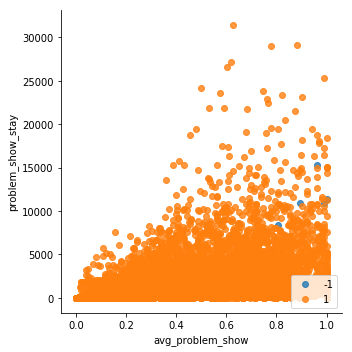

In [214]:
sns.lmplot( x="avg_problem_show", y="problem_show_stay", data=R_LS_anomaly, 
           fit_reg=False, hue='outliers', legend=False)
plt.legend(loc='lower right')

# Exportation reflective features 

In [217]:
R_LS_inliers=Ref_LS[Ref_LS.index!="d6d0454b50adf5d40c30d30eb369e2b675eea67f"]

In [218]:
R_LS_inliers.columns

Index(['nbr_events', 'nbr_week', 'nbr_problem_show', 'problem_show_stay',
       'avg_problem_show', 'outline', 'view_post'],
      dtype='object')

In [219]:
R_LS_inliers.to_csv("reflective_features_inliers.csv",columns=['anon_screen_name', 'nbr_events', 'nbr_week', 'nbr_problem_show', 'problem_show_stay',
       'avg_problem_show', 'outline', 'view_post'])